In [23]:
import configparser
import glob
import os
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt


In [59]:
config = configparser.ConfigParser()
config.read("../config.ini")

SAMPLE_DATA_PATH = config.get("PATHS", "SampleData")
SAMPLE_DATA_PATH

'/Volumes/Alvaro_500/SampleData/'

In [52]:
raw_data = pd.read_csv(SAMPLE_DATA_PATH + "metadata.csv")
raw_data.head(5)

,ct_scan,lung_mask,infection_mask,lung_and_infection_mask
0,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
1,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
2,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
3,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
4,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...


In [53]:
def read_nii(path, rotate=False):
    ct_scan = nib.load(path)
    array = ct_scan.get_fdata()
    if rotate:
        array = np.rot90(np.array(array))
    return array


In [63]:
sample_ct = read_nii(SAMPLE_DATA_PATH + "ct_scans/coronacases_org_001.Nii")
sample_lung = read_nii(SAMPLE_DATA_PATH + "lung_mask/coronacases_001.Nii")
sample_infe = read_nii(SAMPLE_DATA_PATH + "infection_mask/coronacases_001.Nii")
sample_all = read_nii(SAMPLE_DATA_PATH + "lung_and_infection_mask/coronacases_001.Nii")


In [64]:
sample_ct.shape

(512, 512, 301)

In [65]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')

    plt.subplot(1,4,2)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Lung Mask')

    plt.subplot(1,4,3)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[2], alpha=0.5, cmap=color_map)
    plt.title('Infection Mask')

    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[3], alpha=0.5, cmap=color_map)
    plt.title('Lung and Infection Mask')

    plt.show()

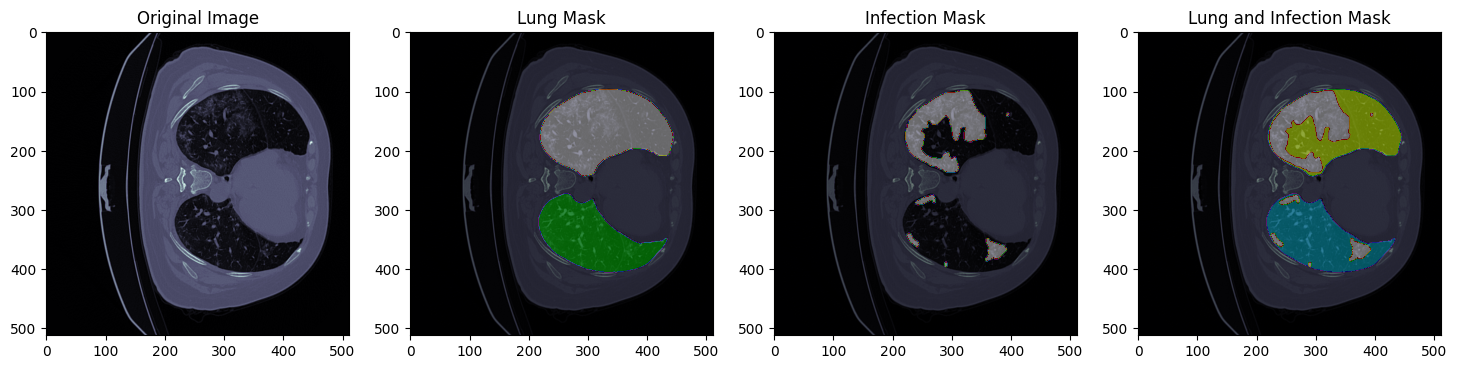

In [66]:
plot_sample([sample_ct[...,120], sample_lung[...,120], sample_infe[...,120], sample_all[...,120]])

In [68]:
type(sample_ct)

numpy.memmap